In [60]:
# 학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression   # 1. Linear Regression
from sklearn.linear_model import Lasso              # 2. Lasso
from sklearn.linear_model import Ridge              # 3. Ridge
from xgboost.sklearn import XGBRegressor            # 4. XGBoost
from lightgbm.sklearn import LGBMRegressor          # 5. LightGBM

from sklearn.metrics import mean_squared_error

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from tqdm import tqdm

In [62]:
import pandas as pd

Kadid =pd.read_csv("C:/Users/Home/Desktop/IQA/NRIQA_df_last.csv")


In [63]:
df=Kadid

In [64]:
df.head()

,CPBD,NIQE,BRISQUE,CNNIQA,ILNIQE,HYPER,WaDIQaM_LIVE,DIQaM_LIVE,WaDIQaM_TID,DIQaM_TID,DMOS,DIST_IMG
0,0.524,15.288,18.468,17.725,22.025,67.377,7.515,29.026,34.108,35.453,4.57,I01_01_01.png
1,0.407,16.106,26.225,21.482,24.490,59.614,26.515,35.895,33.785,35.580,4.33,I01_01_02.png
2,0.131,18.836,50.731,43.691,36.201,42.574,44.362,47.225,43.473,37.948,2.67,I01_01_03.png
3,0.005,18.813,70.424,61.468,59.741,38.503,56.649,58.178,58.608,40.670,1.67,I01_01_04.png
4,0.000,17.540,90.263,78.708,90.068,43.387,52.663,65.557,78.039,36.814,1.10,I01_01_05.png


In [65]:
x = df.drop(columns=['NIQE','DMOS','DIST_IMG'])
y = df['DMOS']

### Feature selection 된 columns

In [66]:

columns = ['ILNIQE', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE', 'WaDIQaM_TID', 'CNNIQA','BRISQUE','CPBD']


In [67]:
x_train = x[300:]
x_val = x[:300]
y_train = y[300:]
y_val = y[:300]

### kadidset NR_Metric LGBM 학습

In [68]:
hist = list()
hist_cor=list()

x_train = x[300:]
x_val = x[:300]
y_train = y[300:]
y_val = y[:300]

LGBM_reg = LGBMRegressor()


LGBM_reg.fit(x_train, y_train)


pred_train2 = LGBM_reg.predict(x_train)


pred_val2 = LGBM_reg.predict(x_val)

mse_train2 = mean_squared_error(y_train, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)


print("LightGBM, train/val\t\t = %.4f, %.4f" % (mse_train2, mse_val2))

hist.append([mse_train2, mse_val2])

result_val = pd.DataFrame({"mos": y_val, 
                          "reg2": pred_val2})

rocc_val = abs(result_val.corr(method="spearman"))
lcc_val = abs(result_val.corr(method="pearson"))
print("LightGBM, ROCC/LCC\t\t = %.4f, %.4f" % (rocc_val.loc["mos", "reg2"], lcc_val.loc["mos", "reg2"]))

hist_cor.append([rocc_val.loc["mos", "reg2"], lcc_val.loc["mos", "reg2"]])


LightGBM, train/val		 = 0.0107, 0.1808
LightGBM, ROCC/LCC		 = 0.9222, 0.9411


### testset ref 읽어오기

In [18]:
testset =pd.read_csv("C:/Users/Home/Desktop/IQA/NRIQA_df_testset_all.csv")

In [19]:
test_ref=testset[columns]

### testset 학습된 모델에 input

In [21]:
pred_train=LGBM_reg.predict(test_ref)

In [24]:
testset["pred"] = pred_train

In [25]:
testset

,CPBD,NIQE,BRISQUE,CNNIQA,ILNIQE,HYPER,WaDIQaM_LIVE,DIQaM_LIVE,WaDIQaM_TID,DIQaM_TID,DIST,pred
0,0.110,16.514,55.632,27.304,47.736,49.708,0.672,14.822,41.750,31.008,high,2.116563
1,0.070,13.555,58.664,28.134,48.985,36.220,0.146,4.172,40.418,32.561,high,1.818565
2,0.054,13.429,59.210,29.553,47.442,50.365,27.355,17.135,32.744,37.524,high,2.469374
3,0.073,13.518,59.874,29.035,47.185,45.570,13.194,16.671,63.904,47.109,high,2.024597
4,0.056,13.177,59.195,29.045,47.229,43.568,26.081,24.954,46.581,31.422,high,1.786688
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.512,37.663,82.061,74.090,75.053,41.711,20.647,18.844,43.418,47.051,low,1.577624
996,0.454,31.211,84.039,72.982,67.811,37.756,13.261,16.202,59.422,49.809,low,1.408153
997,0.423,27.146,85.132,73.787,70.940,24.275,53.529,56.328,58.233,53.391,low,1.562508
998,0.429,26.361,84.892,73.292,69.478,39.504,24.302,16.750,44.476,48.481,low,1.664415


In [26]:
columns

['ILNIQE', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE', 'WaDIQaM_TID', 'CNNIQA']

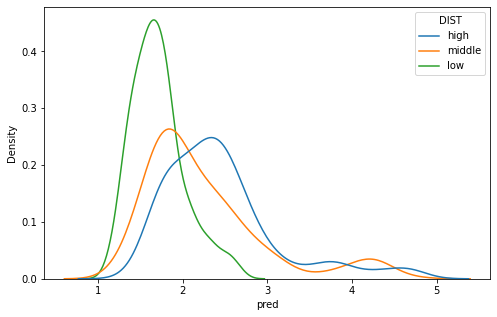

In [58]:
plt.figure(figsize=(8,5))
sns.kdeplot(data = testset,x="pred",  hue = "DIST")
plt.show()

In [56]:
x.columns

Index(['ILNIQE', 'HYPER', 'WaDIQaM_LIVE', 'DIQaM_LIVE', 'WaDIQaM_TID',
       'CNNIQA'],
      dtype='object')

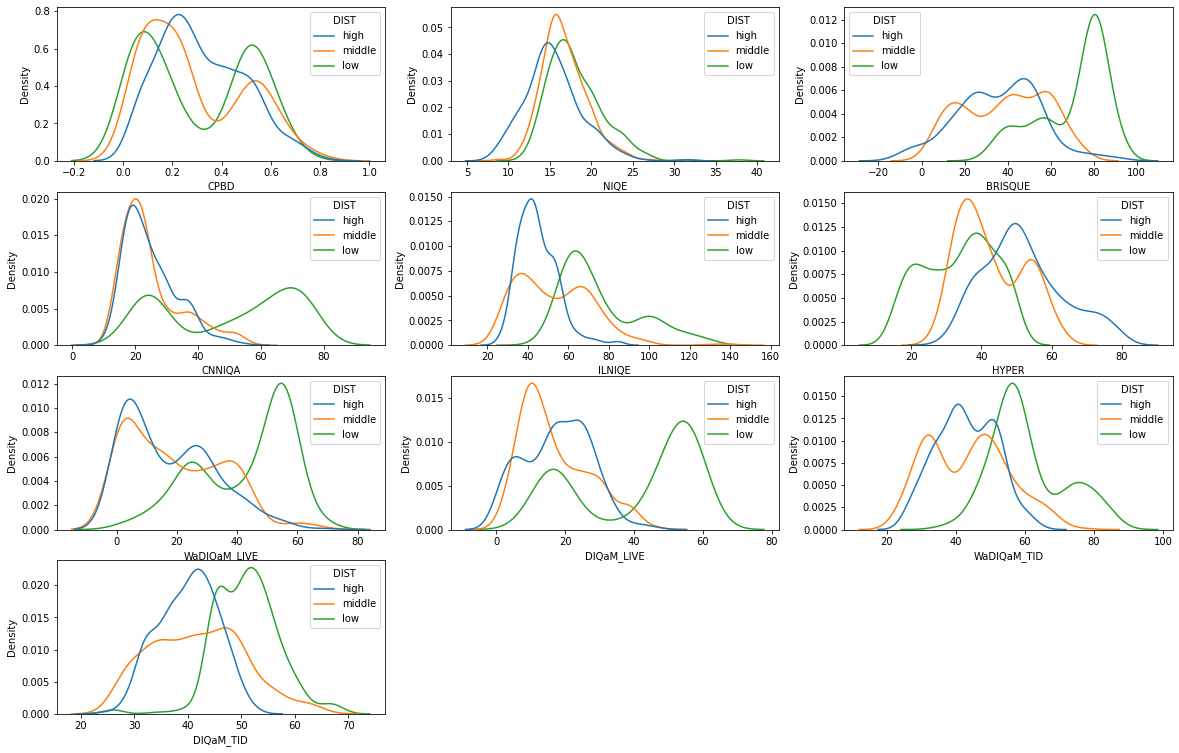

In [55]:
plt.figure(figsize=(20,13))
n=1
for i in testset[['CPBD', 'NIQE', 'BRISQUE', 'CNNIQA', 'ILNIQE', 'HYPER', 'WaDIQaM_LIVE',
       'DIQaM_LIVE', 'WaDIQaM_TID', 'DIQaM_TID']] :
    plt.subplot(4,3,n)
    
    sns.kdeplot(data = testset,x=f'{i}',  hue = "DIST")
    
    n+=1
plt.show()
